In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text

In [2]:
sfi_grants = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2026/2026-02-24/sfi_grants.csv")

In [3]:
sfi_grants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start_date                   7269 non-null   object 
 1   end_date                     7269 non-null   object 
 2   proposal_id                  7269 non-null   object 
 3   programme_name               7261 non-null   object 
 4   sub_programme                2768 non-null   object 
 5   supplement                   1424 non-null   object 
 6   research_body                7269 non-null   object 
 7   research_body_ror_id         6935 non-null   object 
 8   funder_name                  7269 non-null   object 
 9   crossref_funder_registry_id  7269 non-null   object 
 10  proposal_title               7267 non-null   object 
 11  current_total_commitment     7269 non-null   float64
dtypes: float64(1), object(11)
memory usage: 681.6+ KB


In [4]:
sfi_grants.head(2)

,start_date,end_date,proposal_id,programme_name,sub_programme,supplement,research_body,research_body_ror_id,funder_name,crossref_funder_registry_id,proposal_title,current_total_commitment
0,2001-10-01,2007-03-31,00/PI.1/B038,Principal Investigator Programme,NaN,NaN,Trinity College Dublin (TCD),https://ror.org/02tyrky19,Science Foundation Ireland,10.13039/501100001602,Establishing functional proteomic maps of prot...,5471668.03
1,2001-10-01,2006-12-04,00/PI.1/B045,Principal Investigator Programme,NaN,NaN,Trinity College Dublin (TCD),https://ror.org/02tyrky19,Science Foundation Ireland,10.13039/501100001602,Pathogen-derived immunomodulatory molecules: f...,8069351.70


In [5]:
# Covert date columns to datetime and create a new start year column
sfi_grants["start_date"] = pd.to_datetime(sfi_grants["start_date"])
sfi_grants["end_date"] = pd.to_datetime(sfi_grants["end_date"])
sfi_grants["start_year"] = sfi_grants["start_date"].dt.year

In [6]:
# Create a copy of df
df = sfi_grants.copy()

In [7]:
# Top 4 research body list
unis = ["Trinity College Dublin (TCD)", "University College Dublin (UCD)", "University College Cork (UCC)", "University of Galway"]
# Replace research bodies that are not in the list to Other
df["research_body"] = df["research_body"].where(df["research_body"].isin(unis), "Other")

In [8]:
# Select relevant columns
df = df[["start_year", "research_body", "current_total_commitment"]]

In [9]:
# Group by year and research body and aggregate grants
df_grouped = df.groupby(["start_year", "research_body"])["current_total_commitment"].sum().reset_index()
# Reshape df
df_pivot = pd.pivot(df_grouped, index="start_year", columns="research_body", values="current_total_commitment")
# Fill misssing values with 0
df_pivot = df_pivot.fillna(0)

In [10]:
df_pivot

research_body,Other,Trinity College Dublin (TCD),University College Cork (UCC),University College Dublin (UCD),University of Galway
start_year,,,,,
2001,1.727569e+07,50271813.49,8.240515e+06,0.00,0.00
2002,1.922838e+07,10262301.16,5.597340e+06,10459846.46,8142039.23
2003,5.727781e+07,33308494.58,2.930396e+07,16170090.01,14061458.98
2004,3.772297e+07,41381260.71,1.898977e+07,26537491.94,21492125.82
2005,4.205708e+07,11890470.42,7.127292e+06,15751855.75,6772189.42
2006,3.088670e+07,22960742.07,1.707073e+07,28852369.79,6642581.13
2007,1.221152e+08,59161208.06,3.912218e+07,55458411.20,23478117.33
2008,5.466455e+07,41235693.62,3.296276e+07,33083907.26,39430707.06
2009,5.717180e+07,43420264.83,1.095268e+07,59946068.40,26884318.69


In [11]:
# Load camp
cmap = load_cmap("AsteroidCity1")
colors=cmap.colors

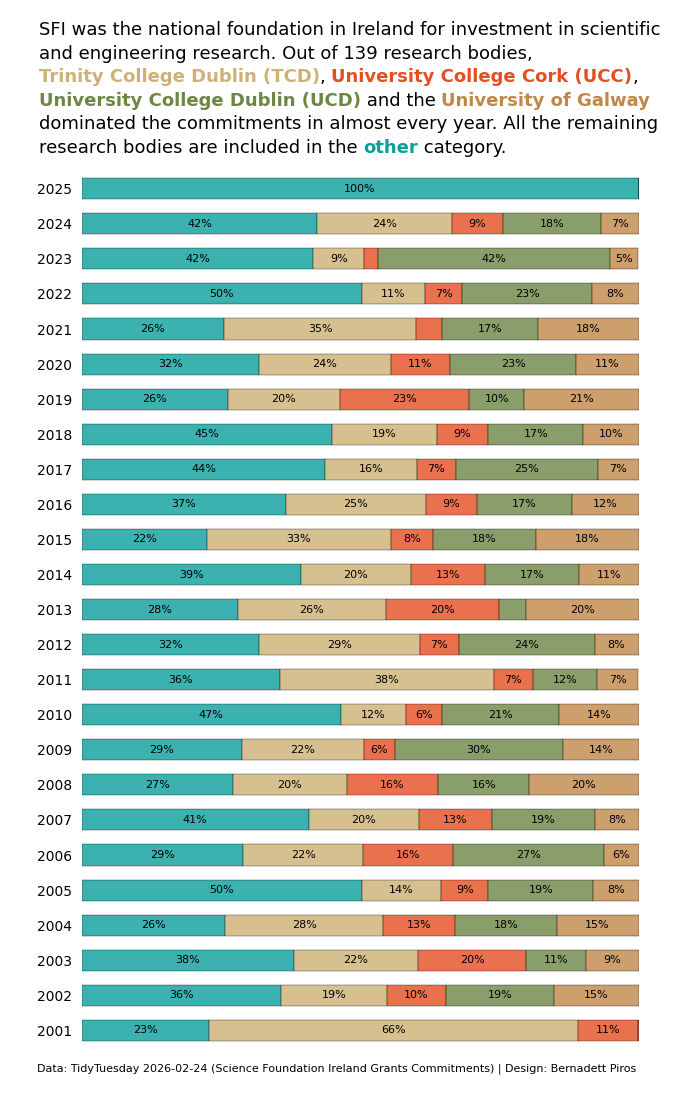

In [12]:
# Prepare data
data = df_pivot.values
colnames = df_pivot.columns

# Normalize rows to 100%, the summed axis stays as a dimension of size 1
row_sums = data.sum(axis=1, keepdims=True)  
data_pct = data / row_sums * 100

# Cumulative positions
data_cum = data_pct.cumsum(axis=1)

# y positions
bar_y_positions = np.arange(len(df_pivot))

# Create figure
fig, ax = plt.subplots(figsize=(7, 11))
# Aesthetics
ax.set_xlim(0, 100)   
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.set_xticks([])
ax.tick_params(axis="both", which="both", width=0)

# Plot bars
for i, (colname, color) in enumerate(zip(colnames, colors)):
    widths = data_pct[:, i]
    starts = data_cum[:, i] - widths

    rects = ax.barh(
        bar_y_positions,
        widths,
        height=0.6,
        left=starts,
        label=colname,
        color=color,
        alpha=0.8,
        edgecolor="black",
        linewidth=0.3
    )

    # Show labels only if bar segment > 5%
    labels = [f'{w:.0f}%' if w > 5 else "" for w in widths]
    ax.bar_label(rects, labels=labels, label_type="center", fontsize=8)

# y axis labels
ax.set_yticks(bar_y_positions)
ax.set_yticklabels(df_pivot.index)

title = """
    SFI was the national foundation in Ireland for investment in scientific
    and engineering research. Out of 139 research bodies,
    <Trinity College Dublin (TCD)>, <University College Cork (UCC)>,
    <University College Dublin (UCD)> and the <University of Galway>
    dominated the commitments in almost every year. All the remaining
    research bodies are included in the <other> category.
    """


fig_text(0.03, 0.985, s=title, size=13, 
         highlight_textprops=[
             {"color": cmap.colors[1], "weight":"bold"},
             {"color": cmap.colors[2], "weight":"bold"},
             {"color": cmap.colors[3], "weight":"bold"},
             {"color": cmap.colors[4], "weight":"bold"},             
             {"color": cmap.colors[0], "weight":"bold"}
             ],
         ax=ax
        )

# Add caption
fig.text(0.06, 0.025, "Data: TidyTuesday 2026-02-24 (Science Foundation Ireland Grants Commitments) | Design: Bernadett Piros", size=8)

plt.tight_layout()
plt.show()

# Save figure
#fig.savefig("2026-02-24.png", bbox_inches="tight", pad_inches=0.2)